In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
h_data=pd.read_csv("/heart_disease_uci.csv")
#dataset converted to csv file

In [ ]:
h_data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
h_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Drop the id and dataset 

h_data.drop(['id','dataset'], axis=1, inplace=True)
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [ ]:
h_data.describe()


,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
# Separate numeric and categorical variables 
Catagorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
Numerical= ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

heart_cat = h_data[Catagorical]
heart_num = h_data[Numerical]

heart_cat.nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
thal       3
ca         4
dtype: int64

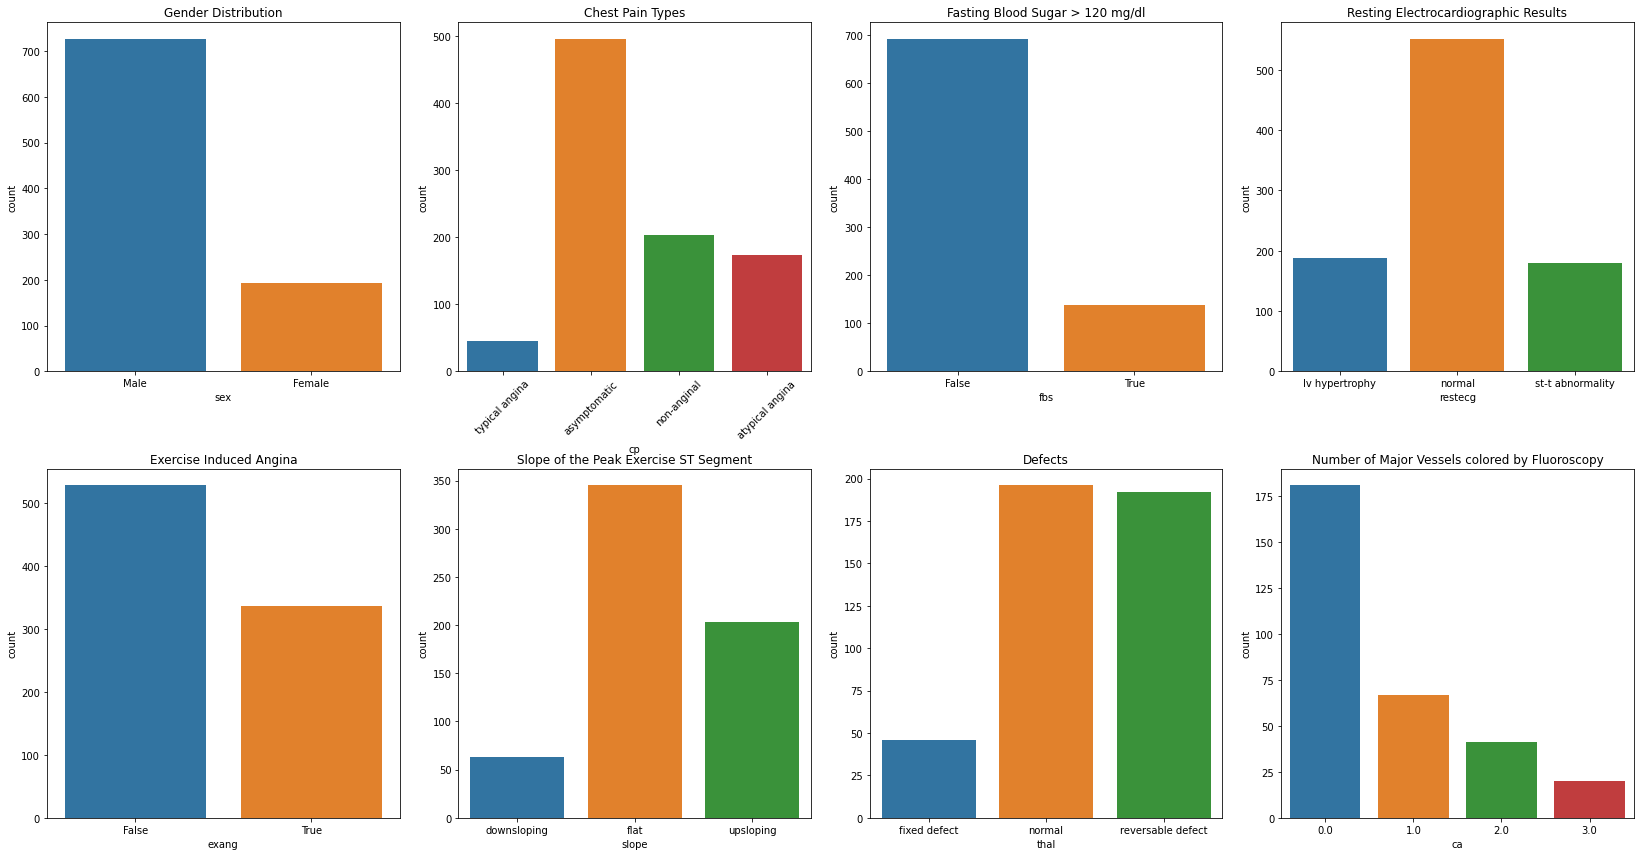

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(23,12))

sns.countplot(x='sex', data=heart_cat, ax=axes[0,0])
axes[0,0].set_title('Gender Distribution')

sns.countplot(x='cp', data=heart_cat, ax=axes[0,1])
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Chest Pain Types')
sns.countplot(x='thal', data=heart_cat, ax=axes[1,2])
axes[1,2].set_title('Defects')
sns.countplot(x='ca', data=heart_cat, ax=axes[1,3])
axes[1,3].set_title('Number of Major Vessels colored by Fluoroscopy')
plt.tight_layout()
sns.countplot(x='slope', data=heart_cat, ax=axes[1,1])
axes[1,1].set_title('Slope of the Peak Exercise ST Segment')
sns.countplot(x='fbs', data=heart_cat, ax=axes[0,2])
axes[0,2].set_title('Fasting Blood Sugar > 120 mg/dl')
sns.countplot(x='restecg', data=heart_cat, ax=axes[0,3])
axes[0,3].set_title('Resting Electrocardiographic Results')
sns.countplot(x='exang', data=heart_cat, ax=axes[1,0])
axes[1,0].set_title('Exercise Induced Angina')

plt.show()

In [ ]:
h_data.groupby('num').mean()

,age,trestbps,chol,thalch,oldpeak,ca
num,,,,,,
0,50.547445,129.913043,227.905612,148.800512,0.418205,0.278788
1,53.528302,132.861111,195.255814,131.035714,1.001200,0.741379
2,57.577982,133.613861,143.859813,128.666667,1.353465,1.222222
3,59.214953,136.152174,159.716981,120.500000,1.581319,1.459459
4,59.214286,138.720000,192.148148,127.846154,2.307692,1.692308


In [ ]:
h_data.loc[h_data['chol']==0,:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,32,Male,typical angina,95.0,0.0,NaN,normal,127.0,False,0.7,upsloping,NaN,NaN,1
598,34,Male,asymptomatic,115.0,0.0,NaN,NaN,154.0,False,0.2,upsloping,NaN,NaN,1
599,35,Male,asymptomatic,NaN,0.0,NaN,normal,130.0,True,NaN,NaN,NaN,reversable defect,3
600,36,Male,asymptomatic,110.0,0.0,NaN,normal,125.0,True,1.0,flat,NaN,fixed defect,1
601,38,Female,asymptomatic,105.0,0.0,NaN,normal,166.0,False,2.8,upsloping,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,43,Male,asymptomatic,122.0,0.0,False,normal,120.0,False,0.5,upsloping,NaN,NaN,1
819,63,Male,non-anginal,130.0,0.0,True,st-t abnormality,160.0,False,3.0,flat,NaN,NaN,0
822,48,Male,non-anginal,102.0,0.0,NaN,st-t abnormality,110.0,True,1.0,downsloping,NaN,NaN,1
839,56,Male,asymptomatic,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
# Old Peak filling mean values

mean_peak = heart_df.oldpeak.mean()
heart_df = heart_df.fillna(value={'oldpeak': mean_peak})
heart_df.loc[heart_df['oldpeak']==0, 'oldpeak'] = mean_peak

In [ ]:
# Cholesterol with meadian
median_chol = h_data.loc[h_data['chol']!=0, 'chol'].median()
heart_df = h_data.fillna(value={'chol': median_chol})
heart_df.loc[heart_df['chol']==0, 'chol'] = median_chol 
#Blood Pressure with mean
mean_bp = heart_df.loc[heart_df['trestbps']!=0,'trestbps'].mean()
heart_df = heart_df.fillna(value={'trestbps': mean_bp})
heart_df.loc[heart_df['trestbps']==0, 'trestbps'] = mean_bp
# Maximum Heart Rate with mean
mean_hr = heart_df.loc[heart_df['thalch']!=0,'thalch'].mean()
heart_df = heart_df.fillna(value={'thalch': mean_hr})
heart_df.loc[heart_df['thalch']==0, 'thalch'] = mean_hr

In [ ]:
# Droping cols with more number of missing values and changing datatypes
heart_df.drop(labels=['ca','thal','slope'], axis=1, inplace=True)
heart_df = heart_df.astype({'sex':'category', 'cp':'category', 'fbs':'bool', 'restecg':'category', 'exang':'bool'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


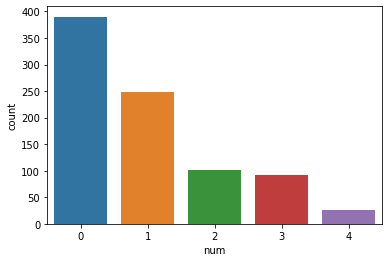

In [ ]:
# Drop other rows with missing values and displaying distribution for  the target variables

heart_df.dropna(inplace=True)
sns.countplot('num', data=heart_df)
plt.show()

               age  trestbps      chol    thalch   oldpeak        ca       num
age       1.000000  0.244253 -0.086234 -0.365778  0.258243  0.370416  0.339596
trestbps  0.244253  1.000000  0.092853 -0.104899  0.161908  0.093705  0.122291
chol     -0.086234  0.092853  1.000000  0.236121  0.047734  0.051606 -0.231547
thalch   -0.365778 -0.104899  0.236121  1.000000 -0.151174 -0.264094 -0.366265
oldpeak   0.258243  0.161908  0.047734 -0.151174  1.000000  0.281817  0.443084
ca        0.370416  0.093705  0.051606 -0.264094  0.281817  1.000000  0.516216
num       0.339596  0.122291 -0.231547 -0.366265  0.443084  0.516216  1.000000


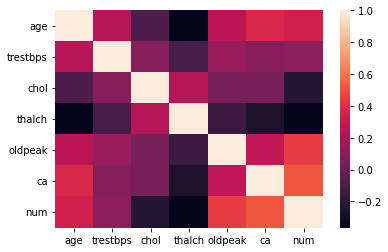

In [ ]:
#heat map
corr = h_data.corr()
print(corr)

sns.heatmap(corr)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
#onehot encoding the cat values and splitting
h_onehot = pd.get_dummies(heart_df, columns=['sex','cp', 'fbs', 'restecg', 'exang'])

X = h_onehot.drop('num', axis=1)
y = h_onehot.num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.value_counts()

0    321
1    197
2     75
3     68
4     23
Name: num, dtype: int64

In [ ]:
h_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 919
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       856 non-null    int64  
 1   trestbps                  856 non-null    float64
 2   chol                      856 non-null    float64
 3   thalch                    856 non-null    float64
 4   oldpeak                   856 non-null    float64
 5   num                       856 non-null    int64  
 6   sex_Female                856 non-null    uint8  
 7   sex_Male                  856 non-null    uint8  
 8   cp_asymptomatic           856 non-null    uint8  
 9   cp_atypical angina        856 non-null    uint8  
 10  cp_non-anginal            856 non-null    uint8  
 11  cp_typical angina         856 non-null    uint8  
 12  fbs_False                 856 non-null    uint8  
 13  fbs_True                  856 non-null    uint8  
 14  restecg_lv

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69        69
           1       0.42      0.43      0.42        51
           2       0.33      0.27      0.30        26
           3       0.30      0.30      0.30        23
           4       0.14      0.33      0.20         3

    accuracy                           0.49       172
   macro avg       0.38      0.40      0.38       172
weighted avg       0.49      0.49      0.49       172



In [ ]:
# Perform Decision Tree model with class weighting
weights = {0:1, 1:0.5, 2:0.5, 3:0.5, 4:0.5}

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, class_weight='balanced')
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.52      0.66        69
           1       0.35      0.18      0.23        51
           2       0.19      0.46      0.27        26
           3       0.19      0.26      0.22        23
           4       0.00      0.00      0.00         3

    accuracy                           0.37       172
   macro avg       0.33      0.28      0.28       172
weighted avg       0.52      0.37      0.40       172

